Saving Predict loan default data set.xlsx to Predict loan default data set.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             599 non-null    int64  
 1   Income          599 non-null    int64  
 2   LoanAmount      599 non-null    int64  
 3   CreditScore     599 non-null    int64  
 4   MonthsEmployed  599 non-null    int64  
 5   NumCreditLines  599 non-null    int64  
 6   InterestRate    599 non-null    float64
 7   LoanTerm        599 non-null    int64  
 8   DTIRatio        599 non-null    float64
 9   Education       599 non-null    object 
 10  EmploymentType  599 non-null    object 
 11  MaritalStatus   599 non-null    object 
 12  HasMortgage     599 non-null    object 
 13  HasDependents   599 non-null    object 
 14  LoanPurpose     599 non-null    object 
 15  HasCoSigner     599 non-null    object 
 16  

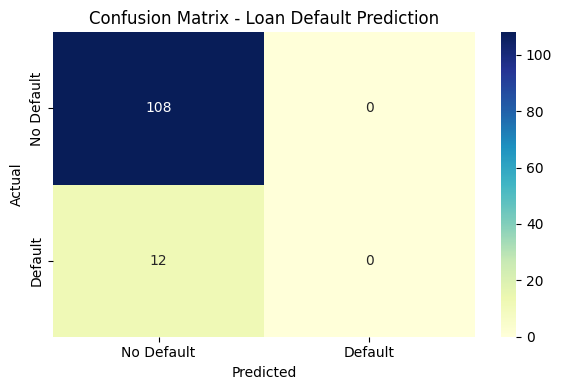

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files

# Upload dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load dataset
if file_name.endswith('.csv'):
    df = pd.read_csv(file_name)
elif file_name.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(file_name)
else:
    raise ValueError("Unsupported file type. Please upload a CSV or Excel file.")

# Preview data
print(df.info())
print(df.head())

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check if target column exists
if 'Default' not in df.columns:
    raise ValueError("Expected target column 'Default'. Please ensure your dataset has this column (1=default, 0=no default).")

# Features and Target
X = df.drop(columns=['Default'])  # Your target column
y = df['Default']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n📊 Model Evaluation Metrics")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Default Prediction")
plt.tight_layout()
plt.show()
